# Module 3 - Homework 1

## Problem 6.3 - Predicting Airfare on New Routes. 

The following problem takes place in the United States in the late 1990s, when many major US cities were facing issues with airport congestion, partly as a result of the 1978 deregulation of airlines. Both fares and routes were freed from regulation, and low-fare carriers such as Southwest (SW) began competing on existing routes and starting nonstop service on routes that previously lacked it. Building completely new airports is generally not feasible, but sometimes decommissioned military bases or smaller municipal airports can be reconfigured as regional or larger commercial airports. There are numerous players and interests involved in the issue (airlines, city, state and federal authorities, civic groups, the military, airport operators), and an aviation consulting firm is seeking advisory contracts with these players. The firm needs predictive models to support its consulting service. One thing the firm might want to be able to predict is fares, in the event a new airport is brought into service. The firm starts with the file Airfares.csv , which contains real data that were collected between Q3—1996 and Q2—1997. The variables in these data are listed in Table 6.13 , and are believed to be important in predicting FARE. Some airport-to-airport data are available, but most data are at the city-to-city level. One question that will be of interest in the analysis is the effect that the presence or absence of Southwest has on FARE.

Table 6.13 Description of Variables for Airfare Example

| Variable   | Description                                                                                                                        |
| ---        | ---                                                                                                                                |
| S_CODE     | Starting airport’s code                                                                                                            |
| S_CITY     | Starting city                                                                                                                      |
| E_CODE     | Ending airport’s code                                                                                                              |
| E_CITY     | Ending city                                                                                                                        |
| COUPON     | Average number of coupons (a one-coupon flight is a nonstop flight, a two-coupon flight is a one-stop flight, etc.) for that route |
| NEW        | Number of new carriers entering that route between Q3—1996 and Q2—1997                                                             |
| VACATION   | Whether (Yes) or not (No) a vacation route                                                                                         |
| SW         | Whether (Yes) or not (No) Southwest Airlines serves that route                                                                     |
| HI         | Herfindahl index: measure of market concentration                                                                                  |
| S_INCOME   | Starting city’s average personal income                                                                                            |
| E_INCOME   | Ending city’s average personal income                                                                                              |
| S_POP      | Starting city’s population                                                                                                         |
| E_POP      |  Ending city’s population                                                                                                          |
| SLOT       | Whether or not either endpoint airport is slot-controlled (this is a measure of airport congestion)                                |
| GATE       | Whether or not either endpoint airport has gate constraints (this is another measure of airport congestion)                        |
| DISTANCE   | Distance between two endpoint airports in miles                                                                                    |
| PAX        | Number of passengers on that route during period of data collection                                                                |
| FARE       | Average fare on that route                                                                                                         |

-- 

Shmueli, Galit,Bruce, Peter C.,Gedeck, Peter,Patel, Nitin R.. Data Mining for Business Analytics (Kindle Locations 6471-6475). Wiley. Kindle Edition. 

- a) Explore the numerical predictors and outcome (FARE) by creating a correlation table and examining some scatterplots between FARE and those predictors. What seems to be the best single predictor of FARE?
- b) Explore the categorical predictors (excluding the first four) by computing the percentage of flights in each category. Create a pivot table with the average fare in each category. Which categorical predictor seems best for predicting FARE?
- c) Find a model for predicting the average fare on a new route:

   - i) Convert categorical variables into dummy variables. Then, partition the data into training and validation sets. The model will be fit to the training data and evaluated on the validation set.

   - ii) Use stepwise regression to reduce the number of predictors. You can ignore the first four predictors (S_CODE, S_CITY, E_CODE, E_CITY). Report the estimated model selected.

   - iii) Repeat (ii) using exhaustive search instead of stepwise regression. Compare the resulting best model to the one you obtained in (ii) in terms of the predictors that are in the model.

   - iv) Compare the predictive accuracy of both models (ii) and (iii) using measures such as RMSE and average error and lift charts.

   - v) Using model (iii), predict the average fare on a route with the following characteristics: COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI = 4442.141, S\_INCOME = \$28,760, E\_INCOME = \$27,664, S_POP = 4,557,004, E\_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12,782, DISTANCE = 1976 miles.

   - vi) Predict the reduction in average fare on the route in (v) if Southwest decides to cover this route [using model (iii)].

   - vii) In reality, which of the factors will not be available for predicting the average fare from a new airport (i.e., before flights start operating on those routes)? Which ones can be estimated? How?

   - viii) Select a model that includes only factors that are available before flights begin to operate on the new route. Use an exhaustive search to find such a model. 

   - ix) Use the model in (viii) to predict the average fare on a route with characteristics COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI = 4442.141, S\_INCOME = \$28,760, E\_INCOME = \$27,664, S_ POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12,782, DISTANCE = 1976 miles. 

   - x) Compare the predictive accuracy of this model with model (iii). Is this model good enough, or is it worthwhile reevaluating the model once flights begin on the new route? 

- d) In competitive industries, a new entrant with a novel business plan can have a disruptive effect on existing firms. If a new entrant’s business model is sustainable, other players are forced to respond by changing their business practices. If the goal of the analysis was to evaluate the effect of Southwest Airlines’ presence on the airline industry rather than predicting fares on new routes, how would the analysis be different? Describe technical and conceptual aspects. 

In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from dmba import regressionSummary, exhaustive_search, gainsChart, liftChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


### a) Explore the numerical predictors and outcome (FARE) by creating a correlation table and examining some scatterplots between FARE and those predictors. What seems to be the best single predictor of FARE?

In [ ]:
af_df = pd.read_csv('Airfares.csv')
af_df


,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,LGA,New York/Newark NY,*,West Palm Beach FL,1.08,3,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Controlled,Free,1030,34324,129.63
634,EWR,New York/Newark NY,*,West Palm Beach FL,1.08,0,Yes,No,2216.70,32991.0,37375.0,8621121,991717,Free,Constrained,1030,34324,129.63
635,*,Philadelphia/Camden PA,*,West Palm Beach FL,1.17,3,Yes,No,6797.80,27994.0,37375.0,4948339,991717,Free,Free,960,6016,124.87
636,IAD,Washington DC,*,West Palm Beach FL,1.28,3,Yes,No,5566.43,31981.0,37375.0,4549784,991717,Free,Free,858,4877,129.62


<AxesSubplot:>

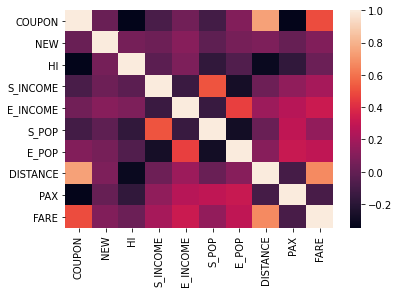

In [ ]:
corr = af_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)


In [ ]:
corr['FARE']

COUPON      0.496537
NEW         0.091730
HI          0.025195
S_INCOME    0.209135
E_INCOME    0.326092
S_POP       0.145097
E_POP       0.285043
DISTANCE    0.670016
PAX        -0.090705
FARE        1.000000
Name: FARE, dtype: float64

Based on the correlation data, FARE is more closely tied to DISTANCE than anything else. The second best numerical predictor is COUPON.

<AxesSubplot:xlabel='FARE', ylabel='DISTANCE'>

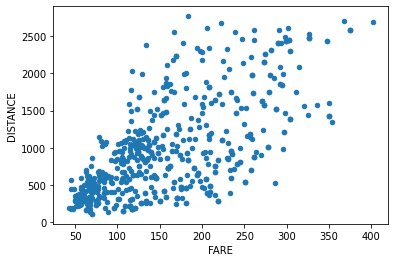

In [ ]:
# Scatter Plot
af_df.plot.scatter(x='FARE', y='DISTANCE')

<AxesSubplot:xlabel='FARE', ylabel='COUPON'>

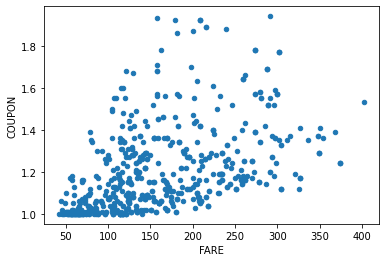

In [ ]:
# Scatter Plot
af_df.plot.scatter(x='FARE', y='COUPON')

### b) Explore the categorical predictors (excluding the first four) by computing the percentage of flights in each category. Create a pivot table with the average fare in each category. Which categorical predictor seems best for predicting FARE?

#### VACATION

In [ ]:
af_df.groupby(['VACATION'])['FARE'].count()

VACATION
No     468
Yes    170
Name: FARE, dtype: int64

In [ ]:
af_df.groupby(['VACATION'])['FARE'].mean()

VACATION
No     173.552500
Yes    125.980882
Name: FARE, dtype: float64

#### SOUTHWEST

In [ ]:
af_df.groupby(['SW'])['FARE'].count()

SW
No     444
Yes    194
Name: FARE, dtype: int64

In [ ]:
af_df.groupby(['SW'])['FARE'].mean()

SW
No     188.182793
Yes     98.382268
Name: FARE, dtype: float64

#### SLOT Controlled

In [ ]:
af_df.groupby(['SLOT'])['FARE'].count()

SLOT
Controlled    182
Free          456
Name: FARE, dtype: int64

In [ ]:
af_df.groupby(['SLOT'])['FARE'].mean()

SLOT
Controlled    186.059396
Free          150.825680
Name: FARE, dtype: float64

#### GATE Contrained

In [ ]:
af_df.groupby(['GATE'])['FARE'].count()

GATE
Constrained    124
Free           514
Name: FARE, dtype: int64

In [ ]:
af_df.groupby(['GATE'])['FARE'].mean()

GATE
Constrained    193.129032
Free           153.095953
Name: FARE, dtype: float64

The best predicator is if the Southwest Airlines Serves the routes (SW). Fares seem to double if SW does not service the route.

### Find a model for predicting the average fare on a new route:

i) Convert categorical variables into dummy variables. Then, partition the data into training and validation sets. The model will be fit to the training data and evaluated on the validation set.




In [ ]:
# i)
# Convert categorical variables into dummy variables. Then, partition the data into training and validation sets.
# The model will be fit to the training data and evaluated on the validation set.

af_df = pd.read_csv('Airfares.csv')
af_df = af_df.drop(columns=['S_CODE','S_CITY', 'E_CODE', 'E_CITY'])
af_df = pd.get_dummies(af_df, prefix_sep='_', drop_first=False)

# create a list of predictor variables by remvoing output variables and text columns
excludeColumns = ('S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'FARE')
predictors = [s for s in af_df.columns if s not in excludeColumns]
outcome = 'FARE'

# partition data
X = af_df[predictors]
y = af_df[outcome]

# training (60%) and validation (40%)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

print('Training X  : ', train_X.shape)
print('Validation X: ', valid_X.shape)

print('Training y  : ', train_y.shape)
print('Validation y: ', valid_y.shape)


Training X  :  (382, 17)
Validation X:  (256, 17)
Training y  :  (382,)
Validation y:  (256,)


In [ ]:
# ii)
# Use stepwise regression to reduce the number of predictors. You can ignore the first four predictors (S_CODE, S_CITY, E_CODE, E_CITY).
# Report the estimated model selected. 

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = stepwise_selection(predictors, train_model, score_model, verbose=True)
print(best_variables)


regressionSummary(train_y, best_model.predict(train_X[list(best_variables)]))

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_No, VACATION_Yes, SW_No, SW_Yes, SLOT_Controlled, SLOT_Free, GATE_Constrained, GATE_Free
Start: score=4379.42, constant
Step: score=4149.88, add DISTANCE
Step: score=4025.89, add SW_No
Step: score=3913.59, add VACATION_No
Step: score=3890.27, add HI
Step: score=3873.33, add GATE_Constrained
Step: score=3852.81, add SLOT_Controlled
Step: score=3850.30, add PAX
Step: score=3844.58, add E_POP
Step: score=3826.43, add S_POP
Step: score=3821.88, add E_INCOME
Step: score=3821.88, unchanged None
['DISTANCE', 'SW_No', 'VACATION_No', 'HI', 'GATE_Constrained', 'SLOT_Controlled', 'PAX', 'E_POP', 'S_POP', 'E_INCOME']

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.8867
            Mean Absolute Error (MAE) : 27.1374
          Mean Percentage Error (MPE) : -4.5313
Mean Absolute Percentage Error (MAPE) : 20.1672


In [ ]:
# iii) Repeat (ii) using exhaustive search instead of stepwise regression.
#      Compare the resulting best model to the one you obtained in (ii) in terms of the predictors that are in the model.

def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return adjusted_r2_score(train_y, pred_y, model)

results = exhaustive_search(predictors, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {'n': result['n'], 'r2adj': result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in predictors})
    data.append(d)

pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(predictors)))


,n,r2adj,AIC,COUPON,DISTANCE,E_INCOME,E_POP,GATE_Constrained,GATE_Free,HI,NEW,PAX,SLOT_Controlled,SLOT_Free,SW_No,SW_Yes,S_INCOME,S_POP,VACATION_No,VACATION_Yes
0,1,-0.001923,4381.153097,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,2,0.002209,4380.568032,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
2,3,0.014435,4376.849173,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,4,-0.088857,4415.910709,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False
4,5,-0.028632,4395.160952,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True,True
5,6,0.049000,4366.167581,False,False,False,False,False,False,True,True,False,True,True,False,False,True,True,False,False
6,7,-0.621203,4570.910149,True,False,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True
7,8,0.093872,4349.661386,False,False,False,False,True,True,True,True,False,True,True,False,False,True,True,False,False
8,9,0.111068,4343.316861,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,True
9,10,0.130975,4335.636940,False,False,False,False,True,True,True,True,False,True,True,False,False,True,True,True,True



Regression statistics

                      Mean Error (ME) : -1.8231
       Root Mean Squared Error (RMSE) : 36.0002
            Mean Absolute Error (MAE) : 28.5002
          Mean Percentage Error (MPE) : -6.6037
Mean Absolute Percentage Error (MAPE) : 21.6048


The exhaustive search seems to come up with a slighlty different model than the stepwise approach. To note, the exhaustive search also took much longer to run. Which means it would be more costly in compute effort if repeated frequently.

Stepwise Model Summary:

Regression statistics

                      Mean Error (ME) : -1.8591
       Root Mean Squared Error (RMSE) : 36.1129
            Mean Absolute Error (MAE) : 28.5252
          Mean Percentage Error (MPE) : -6.7084
Mean Absolute Percentage Error (MAPE) : 21.7198


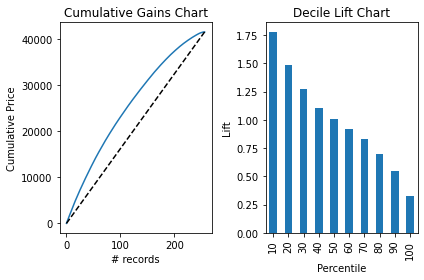

In [ ]:
# iv) Compare the predictive accuracy of both models (ii) and (iii) using measures such as RMSE and average error and lift charts.

# Stepwise (ii)
print('Stepwise Model Summary:')
regressionSummary(valid_y, best_model.predict(valid_X[list(best_variables)]))
pred_v = pd.Series(best_model.predict(valid_X[list(best_variables)]))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show() 


Exhaustive Search Model Summary (#16):

Regression statistics

                      Mean Error (ME) : -1.8231
       Root Mean Squared Error (RMSE) : 36.0002
            Mean Absolute Error (MAE) : 28.5002
          Mean Percentage Error (MPE) : -6.6037
Mean Absolute Percentage Error (MAPE) : 21.6048


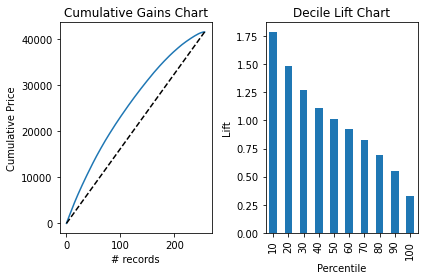

In [ ]:
# Exhaustive List - model 16 (iii)
print('Exhaustive Search Model Summary (#16):')

model = results[16]['model']
variables = list(results[16]['variables'])
regressionSummary(valid_y, model.predict(valid_X[list(variables)]))
pred_v = pd.Series(model.predict(valid_X[list(variables)]))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show() 

In [ ]:
# v) Using model (iii), predict the average fare on a route with the following characteristics:
#    COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI = 4442.141, S_INCOME = $28,760, E_INCOME = $27,664,
#    S_POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12,782, DISTANCE = 1976 miles.

model = results[16]['model']
variables = list(results[16]['variables'])
v_raw_values = [[1.202,3,4442.141,28760,27664,4557004,3195503,1976,12782,True,False,True,False,False,True,False,True]]
# Create the pandas DataFrame 
v_df = pd.DataFrame(v_raw_values, columns = variables) 

v_predicted_fare = model.predict(v_df)

print("The predicted fare is: ",v_predicted_fare[0].round(2))

The predicted fare is:  253.7


In [ ]:
# vi) Predict the reduction in average fare on the route in (v) if Southwest decides to cover this route using model (iii).

model = results[16]['model']
variables = list(results[16]['variables'])
vi_raw_values = [[1.202,3,4442.141,28760,27664,4557004,3195503,1976,12782,True,False,False,True,False,True,False,True]]
# Create the pandas DataFrame 
vi_df = pd.DataFrame(vi_raw_values, columns = variables) 

vi_predicted_fare = model.predict(vi_df)

print("The mew predicted fare is: ",vi_predicted_fare[0].round(2))
print("The reduction would be: ",v_predicted_fare[0].round(2)-vi_predicted_fare[0].round(2))


The mew predicted fare is:  211.54
The reduction would be:  42.16


In [ ]:
# vii) In reality, which of the factors will not be available for predicting the average fare from a new airport
#      (i.e., before flights start operating on those routes)? Which ones can be estimated? How?

# In my opinion, SLOT and GATE, with regards to AIRPORT and GATE would be difficult to find before an airline flies a particular airport.
# SLOT	Whether or not either endpoint airport is slot-controlled (this is a measure of airport congestion)
# GATE	Whether or not either endpoint airport has gate constraints (this is another measure of airport congestion)

In [ ]:
# viii) Select a model that includes only factors that are available before flights begin to operate on the new route.
#       Use an exhaustive search to find such a model.

af_df = pd.read_csv('Airfares.csv')
af_df = af_df.drop(columns=['S_CODE','S_CITY', 'E_CODE', 'E_CITY'])
af_df = pd.get_dummies(af_df, prefix_sep='_', drop_first=False)

# create a list of predictor variables by remvoing output variables and text columns
excludeColumns = ('S_CODE', 'S_CITY', 'E_CODE', 'E_CITY', 'FARE', 'GATE_Constrained', 'GATE_Free', 'SLOT_Controlled', 'SLOT_Free')
predictors = [s for s in af_df.columns if s not in excludeColumns]
outcome = 'FARE'

# partition data
X = af_df[predictors]
y = af_df[outcome]

# training (60%) and validation (40%)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return adjusted_r2_score(train_y, pred_y, model)

results = exhaustive_search(predictors, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {'n': result['n'], 'r2adj': result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in predictors})
    data.append(d)

pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(predictors)))


,n,r2adj,AIC,COUPON,DISTANCE,E_INCOME,E_POP,HI,NEW,PAX,SW_No,SW_Yes,S_INCOME,S_POP,VACATION_No,VACATION_Yes
0,1,-0.001923,4381.153097,False,False,False,False,True,False,False,False,False,False,False,False,False
1,2,0.002209,4380.568032,False,False,False,False,True,False,True,False,False,False,False,False,False
2,3,0.014435,4376.849173,False,False,False,False,True,True,True,False,False,False,False,False,False
3,4,0.039218,4368.108699,False,False,False,False,True,True,True,False,False,False,True,False,False
4,5,0.052042,4363.960966,False,False,False,False,True,True,True,False,False,True,True,False,False
5,6,0.085814,4351.086390,False,False,False,False,True,True,False,False,False,True,True,True,True
6,7,0.096078,4347.752926,False,False,False,False,True,True,True,False,False,True,True,True,True
7,8,0.233996,4285.488079,False,False,True,True,True,True,False,False,False,True,True,True,True
8,9,0.354206,4221.252764,False,False,False,False,True,True,True,True,True,True,True,True,True
9,10,0.371687,4211.741322,False,False,True,True,True,True,False,True,True,True,True,True,True


Exhaustive Search Model Summary (#12):

Regression statistics

                      Mean Error (ME) : -1.7149
       Root Mean Squared Error (RMSE) : 37.0798
            Mean Absolute Error (MAE) : 29.6632
          Mean Percentage Error (MPE) : -7.0117
Mean Absolute Percentage Error (MAPE) : 22.4148


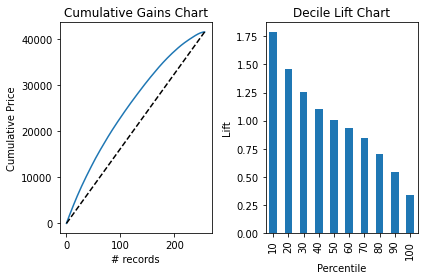

In [ ]:
print('Exhaustive Search Model Summary (#12):')

model = results[12]['model']
variables = list(results[12]['variables'])
regressionSummary(valid_y, model.predict(valid_X[list(variables)]))
pred_v = pd.Series(model.predict(valid_X[list(variables)]))
pred_v = pred_v.sort_values(ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')
ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show() 

In [ ]:
variables

['COUPON',
 'NEW',
 'HI',
 'S_INCOME',
 'E_INCOME',
 'S_POP',
 'E_POP',
 'DISTANCE',
 'PAX',
 'VACATION_No',
 'VACATION_Yes',
 'SW_No',
 'SW_Yes']

In [ ]:
# ix) Use the model in (viii) to predict the average fare on a route with characteristics:
#     COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI = 4442.141, S_INCOME = $28,760, E_INCOME = $27,664,
#     S_ POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12,782, DISTANCE = 1976 miles.

model = results[12]['model']
variables = list(results[12]['variables'])
v_raw_values = [[1.202,3,4442.141,28760,27664,4557004,3195503,1976,12782,True,False,True,False]]
# Create the pandas DataFrame 
v_df = pd.DataFrame(v_raw_values, columns = variables) 

v_predicted_fare = model.predict(v_df)

print("The predicted fare is: ",v_predicted_fare[0].round(2))


The predicted fare is:  259.89


In [ ]:
# x) Compare the predictive accuracy of this model with model (iii). Is this model good enough, or is it worthwhile reevaluating
#    the model once flights begin on the new route?

# The differences betwween the two predicted fairs: $253.70 vs. $259.89 seems close enough that using the earlier model is good enough.


### d) In competitive industries, a new entrant with a novel business plan can have a disruptive effect on existing firms. If a new entrant’s business model is sustainable, other players are forced to respond by changing their business practices. If the goal of the analysis was to evaluate the effect of Southwest Airlines’ presence on the airline industry rather than predicting fares on new routes, how would the analysis be different? Describe technical and conceptual aspects.

If a business was interested in the effect of Southwest's presence. They would likely be interested in developping a model when they could be predict SW's presence based on a list of parameters. 

The model would be developped similar to how our model for 'FARE' was developped but instead would predict 'SW' using other parameters, including average fare. 

So using input like:

| VAR       | VALUES     |
| ---       | ---        |
| COUPON    | 1.202      |
| NEW       | 3          |
| VACATION  | No         |
| HI        | 4442.141   |
| S_INCOME  | $28,760    |
| E_INCOME  | $27,664    | 
| S_ POP    | 4,557,004  |
| E_POP     | 3,195,503  |
| SLOT      | Free       |
| GATE      | Free       |
| PAX       | 12,782     |
| DISTANCE  | 1976 miles |
| FARE      | 259.00     |

The model would predict a *Yes* or *No* on SW. If the model says Yes and SW is not year flying this route, the airline could assume that could become a route of interest for Southwest.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52e9ae2e-8d42-48c9-9988-588f5a262306' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>